# Reconocimiento de números

Variables de entrada:


*   Dataset de imágenes MNIST
*   60000 imágenes de 28x28 (B&N)
*   Dimensiones: (60000,28,28,1)

Vaiable objetivo:

*   Categoría numérica(0-9)



# 1.Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importación de la fuente de datos

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train.shape #60000 de 28x28

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

# 3. Preprocesado

3.1 Visualización de imágenes

In [ ]:
primera_imagen = x_train[0]
primera_imagen

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
primera_imagen.shape

(28, 28)

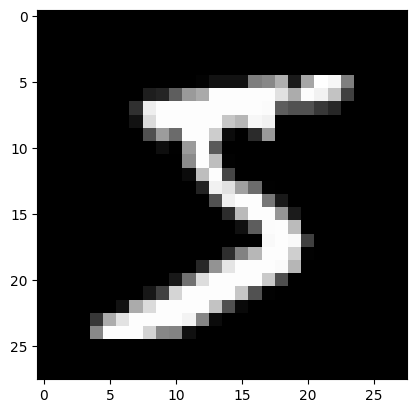

In [ ]:
plt.imshow(primera_imagen,cmap='gray')

3.2 Transformación categórica de la salida

In [ ]:
#Etiquetas de salida
y_train[0]

np.uint8(5)

In [ ]:
from tensorflow.keras.utils import to_categorical
categ_y_train = to_categorical(y_train,10)
categ_y_test = to_categorical(y_test,10)

In [ ]:
categ_y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

3.3 Escalado

In [ ]:
x_train = x_train/255
x_test = x_test/255

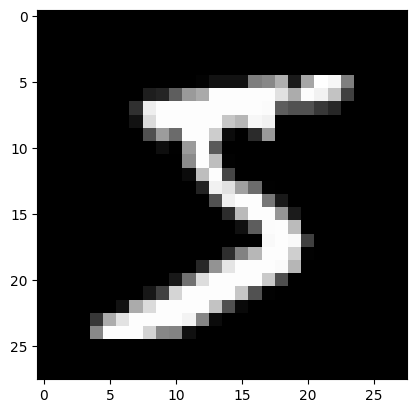

In [ ]:
plt.imshow(primera_imagen,cmap='gray')

3.4 Redimensionar las imágenes

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# 4. Creación del Modelo



*   #Filtros
*   Tamaño de kernel/pool
*   #Capas



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(
    x_train,
    categ_y_train,
    epochs=10,
    validation_data=(x_test,categ_y_test),
    callbacks=[early_stop]
    )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9057 - loss: 0.3095 - val_accuracy: 0.9794 - val_loss: 0.0643
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9836 - loss: 0.0558 - val_accuracy: 0.9843 - val_loss: 0.0456
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9895 - loss: 0.0339 - val_accuracy: 0.9853 - val_loss: 0.0455
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9937 - loss: 0.0213 - val_accuracy: 0.9855 - val_loss: 0.0424
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9958 - loss: 0.0138 - val_accuracy: 0.9862 - val_loss: 0.0461
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9872 - val_loss: 0.0476
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9886 - val_loss: 0.0409
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9983 -

In [ ]:
model.metrics_names

['loss', 'compile_metrics']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.952633,0.157510,0.9794,0.064306
1,0.983883,0.053474,0.9843,0.045606
2,0.988517,0.035844,0.9853,0.045472
3,0.992567,0.023917,0.9855,0.042375
4,0.995117,0.015225,0.9862,0.046136


<Axes: >

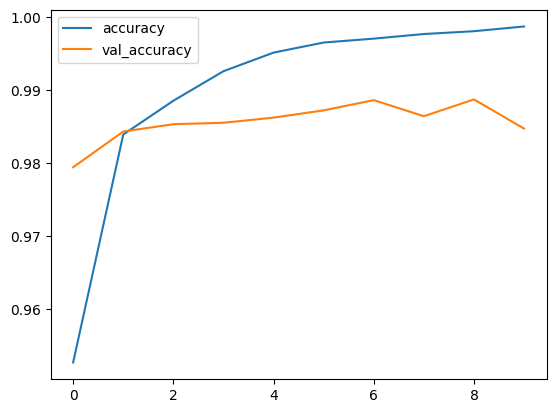

In [ ]:
losses[["accuracy","val_accuracy"]].plot()

<Axes: >

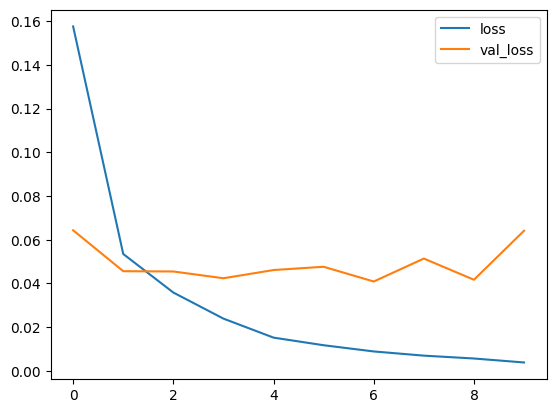

In [ ]:
losses[["loss","val_loss"]].plot()

In [ ]:
print(model.evaluate(x_test,categ_y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9804 - loss: 0.0872
[0.06410514563322067, 0.9847000241279602]


# 5. Exportamos el modelo

In [ ]:
model.save("modelo_mnist.h5")

# 6. Predicción

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
modelo = load_model("/content/modelo_mnist.h5")
img = cv2.imread("/content/n2.png",0)
img_rescaled = cv2.resize(img, (28,28))
img_rescaled = img_rescaled/255.0
img_vector = img_rescaled.reshape(1,28,28,1)
predicion = modelo.predict(img_vector)
print("La clase predicha es:", np.argmax(predicion))

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
